# Assessment Problems

***
***

## Problem 1: Extending the Lady Tasting Tea

---

### Research and Development

---

#### Research Context

The [*Lady Tasting Tea*](https://en.wikipedia.org/wiki/Lady_tasting_tea) experiment, introduced by Sir Ronald A. Fisher in 1935, is a classic example of **design of experiments** and **hypothesis testing**.
A lady claimed she could distinguish whether milk was poured into a cup before or after the tea was added.

The original experiment used eight cups: four milk-first ('M') and four tea-first ('T').
The probability of perfectly identifying the milk-first cups by chance was very low (~0.0143).

Extending the experiment to twelve cups, with four milk-first and eight tea-first, allows us to **estimate the likelihood of success by chance in a larger experiment**.

---

#### Development Considerations

* **Representation:** Using 'M' and 'T' provides a clear and simple way to distinguish between milk-first and tea-first cups.  
* **Randomisation:** Each trial is independent, reflecting the null hypothesis.  
* **Simulation scale:** The experiment uses simple loop-based logic to maintain clarity and transparency in the implementation. 
* **Statistical insight:** Demonstrates probability estimation with explicit loops.  

***

#### Hypotheses

**Null Hypothesis (H₀):**  
The lady cannot distinguish between milk-first and tea-first cups beyond random chance.  

**Alternative Hypothesis (H₁):**  
The lady can distinguish milk-first from tea-first cups with accuracy greater than chance.

---

### Experiment Setup

---

The process begins with the import of NumPy, which provides the foundation for randomisation and numerical computations throughout the experiment.

In [3]:
import numpy as np


Before running the experiment, a fixed random seed is set so that NumPy gives the same random choices every time. This makes the results easier to verify later and helps maintain consistency if someone else wants to repeat the same test.

[The Curious Case of 42: Why Python Loves This Number for Randomization](https://medium.com/ai-simplified-in-plain-english/python-random-seed-42-125a3f2e068f) articule on the Medium website gives interesting explain of why the number 42 is often used by programmers.

In [4]:
# Set random seed for reproducibility
np.random.seed(42)


The experiment defines the total number of cups, specifying how many are milk-first and how many are tea-first.

In [5]:
# Total number of cups in the experiment
total_cups = 12  

# Number of cups where milk was poured first
cups_milk_first = 4  

# Number of cups where tea was poured first
cups_tea_first = 8  


The theoretical probability of correctly identifying all milk-first cups will be calculated using combinatorics.
The total number of unique combinations of milk-first cups is computed, and the probability of a perfect guess is derived.

To find out how many ways the milk-first cups can be chosen from all cups, `numpy.arange` and `numpy.prod` are used.  
`np.arange` creates a sequence of numbers corresponding to the numerator of the combination formula, and `np.prod` multiplies them together to get the total product.  
This calculation gives the number of possible selections of milk-first cups **before considering the order** in which they appear.  
For more details, see the [NumPy documentation on prod](https://numpy.org/doc/stable/reference/generated/numpy.prod.html) and [arange](https://numpy.org/doc/stable/reference/generated/numpy.arange.html).

In [6]:
# Combinatorial calculation of the probability of correctly guessing all milk-first cups

# Number of ways to choose cups_milk_first cups from total_cups
ways_to_choose = np.prod(np.arange(total_cups, total_cups - cups_milk_first, -1))

# Number of ways to order the milk-first cups among themselves
ways_to_order_milk = np.prod(np.arange(cups_milk_first, 0, -1))

# Total number of unique combinations of milk-first cups
total_combinations = ways_to_choose // ways_to_order_milk

# Theoretical probability of correctly guessing all milk-first cups
probability_theoretical = 1 / total_combinations

print(f"Theoretical probability of perfect guess: {probability_theoretical:.8f}")


Theoretical probability of perfect guess: 0.00202020


The theoretical probability provides a mathematical baseline for comparison.

Create the initial arrangement of cups before any shuffling takes place.
To understand how to use `numpy.array`, please visit the official documentation: [NumPy Array](https://numpy.org/doc/stable/reference/generated/numpy.array.html).

This array represents the true configuration of the experiment, where each cup is labelled as either milk-first ('M') or tea-first ('T'). 

In [7]:
# Define the true order of cups: 'M' for milk-first, 'T' for tea-first
true_labels = np.array(['M'] * cups_milk_first + ['T'] * cups_tea_first)

# Display the initial arrangement of cups
print("Initial cup setup:", true_labels)


Initial cup setup: ['M' 'M' 'M' 'M' 'T' 'T' 'T' 'T' 'T' 'T' 'T' 'T']


With the theoretical framework established, the next stage focuses on hypothesis verification.  
A Monte Carlo approach, a computational method that uses repeated random sampling to estimate probabilities, is applied to shuffle the cup arrangement many times and record outcomes where the participant correctly identifies all milk-first cups.  
By comparing the proportion of perfect guesses obtained from these simulated trials with the theoretical probability, the validity of the null hypothesis can be examined empirically.  
For more information, visit the [Monte Carlo method](https://en.wikipedia.org/wiki/Monte_Carlo_method) page on Wikipedia.


To shuffle the cups in each trial, `numpy.random.permutation` is used.  
It creates a new array with the elements in random order, leaving the original array unchanged, which is useful for running multiple simulations.  
See the [NumPy documentation on random.permutation](https://numpy.org/doc/stable/reference/random/generated/numpy.random.permutation.html) for more details.

To model the participant picking cups at random, `numpy.random.choice` is used.  
This lets you select a given number of elements from an array **without replacement**, so the same cup isn’t picked twice in the same trial.  
More information can be found in the [NumPy documentation on random.choice](https://numpy.org/doc/stable/reference/random/generated/numpy.random.choice.html).

To check whether all chosen cups are milk-first, `numpy.all` is applied.  
It returns `True` only if **every element in a boolean array is True**, which is perfect for determining whether a perfect guess occurred in a trial.  
For details, see the [NumPy documentation on all](https://numpy.org/doc/stable/reference/generated/numpy.all.html).


In [8]:
# Number of simulation trials to estimate the probability of a perfect guess
n_trials = 1_000_000

# Counter for the number of perfect guesses observed
successes = 0

# Simulation to estimate the probability of a perfect guess
for _ in range(n_trials):
    # Randomize the cup arrangement each trial
    randomized_labels = np.random.permutation(true_labels)
    
    # Lady randomly picks 4 cups
    guessed_indices = np.random.choice(total_cups, cups_milk_first, replace=False)
    
    # Check if all guessed cups are milk-first
    if np.all(randomized_labels[guessed_indices] == 'M'):
        successes+= 1

# Calculate the probability of a perfect guess
p_value = successes/ n_trials
p_value

0.001926

### Comparison with the Original 8-Cup Experiment

Now that the extended 12-cup experiment has been simulated, the next step is to repeat the same calculation for the original Lady Tasting Tea design (8 cups: 4 milk-first and 4 tea-first).  
This will allow a direct comparison of the probability of a perfect guess by chance between the two setups.

In [9]:
# Theoretical probability for the original 8-cup experiment (4 milk-first, 4 tea-first)

total_cups_original = 8
cups_milk_first_original = 4

# Number of ways to choose cups_milk_first_original cups from total_cups_original
ways_to_choose_original = np.prod(np.arange(total_cups_original, total_cups_original - cups_milk_first_original, -1))

# Number of ways to order the milk-first cups among themselves
ways_to_order_milk_original = np.prod(np.arange(cups_milk_first_original, 0, -1))

# Total number of unique combinations of milk-first cups
total_combinations_original = ways_to_choose_original // ways_to_order_milk_original

# Theoretical probability
probability_theoretical_original = 1 / total_combinations_original

print(f"Theoretical probability (8-cup experiment): {probability_theoretical_original:.8f}")


Theoretical probability (8-cup experiment): 0.01428571


In [10]:
# Monte Carlo simulation for the 8-cup (original) experiment

total_cups = 8
cups_milk_first = 4
cups_tea_first = 4
n_trials = 1_000_000

# True labels
true_labels = np.array(['M'] * cups_milk_first + ['T'] * cups_tea_first)

# Counter for perfect guesses
successes = 0

# Simulation
for _ in range(n_trials):
    randomized_labels = np.random.permutation(true_labels)
    guessed_indices = np.random.choice(total_cups, cups_milk_first, replace=False)
    if np.all(randomized_labels[guessed_indices] == 'M'):
        successes += 1

# Empirical probability
p_value_original = successes / n_trials
print(f"Simulated probability (8-cup experiment): {p_value_original:.8f}")


Simulated probability (8-cup experiment): 0.01451700


### Conclusion

In [11]:
print("Comparison of theoretical and simulated probabilities:\n")

print(f"Original 8-cup experiment (4M/4T):")
print(f"  Theoretical probability: {probability_theoretical_original:.8f}")
print(f"  Simulated probability:   {p_value_original:.8f}\n")

print(f"Extended 12-cup experiment (4M/8T):")
print(f"  Theoretical probability: {probability_theoretical:.8f}")
print(f"  Simulated probability:   {p_value:.8f}\n")

print("Interpretation & Conclusion:")
print(f"- For the original 8-cup experiment, the theoretical probability of a perfect guess is "
      f"{probability_theoretical_original:.8f} and the simulated probability is {p_value_original:.8f}.")
print(f"- For the extended 12-cup experiment, the theoretical probability of a perfect guess is "
      f"{probability_theoretical:.8f} and the simulated probability is {p_value:.8f}.")
print("- The probability of a perfect guess decreases in the 12-cup version, making random success even less likely.")
print("- Using the conventional p-value threshold of 0.05 (not derived from this simulation),\n"
      "  a perfect guess in the 12-cup experiment would be highly unlikely under the null hypothesis.")
print("- Therefore, the standard p-value threshold remains appropriate, and the extended design naturally strengthens the test.")
print("Source: Groenland et al., 2019. Using History to Contextualise p-Values and Significance Testing. "
      "PMC Article: https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6693672/")


Comparison of theoretical and simulated probabilities:

Original 8-cup experiment (4M/4T):
  Theoretical probability: 0.01428571
  Simulated probability:   0.01451700

Extended 12-cup experiment (4M/8T):
  Theoretical probability: 0.00202020
  Simulated probability:   0.00192600

Interpretation & Conclusion:
- For the original 8-cup experiment, the theoretical probability of a perfect guess is 0.01428571 and the simulated probability is 0.01451700.
- For the extended 12-cup experiment, the theoretical probability of a perfect guess is 0.00202020 and the simulated probability is 0.00192600.
- The probability of a perfect guess decreases in the 12-cup version, making random success even less likely.
- Using the conventional p-value threshold of 0.05 (not derived from this simulation),
  a perfect guess in the 12-cup experiment would be highly unlikely under the null hypothesis.
- Therefore, the standard p-value threshold remains appropriate, and the extended design naturally strengthens 

***

## Problem 2: Normal Distribution

***

### Theoretical Overview: Sample vs. Population Standard Deviation

***

#### 1. What is Standard Deviation?

**Standard deviation (SD)** measures how much the values in a dataset deviate from the mean.  
- A **low SD** means values are close to the mean.  
- A **high SD** means values are more spread out.  
Population SD is denoted by **σ**, and sample SD by **s**.  
For more information, visit the [Standard deviation](https://en.wikipedia.org/wiki/Standard_deviation) page on Wikipedia.


#### 2. Population vs. Sample Standard Deviation

- **Population SD (σ):** Used when you have **all the data**. Divides by **N**.  
Learn more on the [NumPy `std()` documentation](https://numpy.org/doc/stable/reference/generated/numpy.std.html) page.

- **Sample SD (s):** Used when you have a **subset of data**. Divides by **n − 1** (Bessel’s correction).  
You can read about this on the [Bessel’s correction](https://en.wikipedia.org/wiki/Bessel%27s_correction) page on Wikipedia.


#### 3. Why the Difference?

Dividing by **n − 1** corrects for bias introduced by estimating the population mean from the sample mean.  
For further details, see the [Bessel’s correction](https://en.wikipedia.org/wiki/Bessel%27s_correction) article.


#### 4. In Practice

- Use **Population SD (`ddof=0`)** if you have **all data**.  
- Use **Sample SD (`ddof=1`)** if you only have a **sample**.  
For guidance, visit the [Pandas `std()` documentation](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.std.html) page.


#### 5. Software Defaults

- **NumPy:** `ddof=0` - population SD  
- **Pandas:** `ddof=1` - sample SD  
More information is available on the [NumPy `std()` documentation](https://numpy.org/doc/stable/reference/generated/numpy.std.html) page.

***

### Research and Development: Effect of Sample Size on SD Estimation

***

**Purpose:**  

- Understand why sample SD (`ddof=1`) and population SD (`ddof=0`) differ.  
- Explore conceptually how differences in SD estimates decrease as sample size increases.  
- This section sets the context for the computations that follow.

***

### Step 1: Import Libraries

We will use:

- `numpy` for generating random samples and computing standard deviations.
- `matplotlib.pyplot` for plotting histograms.


In [10]:
# Import NumPy for numerical computations
import numpy as np
# Import Matplotlib for plotting
import matplotlib.pyplot as plt


#### Step 2: Generate 100,000 Samples of Size 10

Each row represents a single sample of size 10 drawn from a standard normal distribution.


To generate random samples from the standard normal distribution, we use [`numpy.random.randn`](https://numpy.org/doc/stable/reference/random/generated/numpy.random.randn.html).  
It creates an array of normally distributed random numbers with mean 0 and standard deviation 1.  
Each row in the resulting array represents one sample of data.


In [11]:
# Number of samples and size of each sample
num_samples = 100_000
sample_size = 10

# Generate samples from the standard normal distribution
samples = np.random.randn(num_samples, sample_size)


#### Step 3: Computing Sample and Population Standard Deviations

To understand how much each sample varied, the standard deviation was calculated using [`numpy.std`](https://numpy.org/doc/stable/reference/generated/numpy.std.html), along `axis=1`.

##### Why `axis=1`?

Each row of the dataset represents a sample, and each column contains repeated measurements.  
Using `axis=1` measures the spread **within each sample**.  
If `axis=0` were used instead, it would measure the spread **across samples for each measurement**.  

For a clear explanation of axes in NumPy, see [Understanding Axes in NumPy](https://medium.com/@weidagang/understanding-axes-in-numpy-8c889794e541).

##### Sample vs Population Standard Deviation

The `ddof` parameter determines whether the calculation treats the data as a sample or a population:  

- `ddof=1` – Sample SD (unbiased estimate, divides by `n−1`)  
- `ddof=0` – Population SD (divides by `n`, may slightly underestimate small samples)

Full details can be found in the [NumPy documentation](https://numpy.org/doc/stable/reference/generated/numpy.std.html).  

Setting these parameters correctly ensures the results reflect the true variability within each sample.


In [12]:
# Compute sample standard deviation (unbiased, ddof=1)
sample_sd = np.std(samples, axis=1, ddof=1)
# Compute population standard deviation (biased, ddof=0)
population_sd = np.std(samples, axis=1, ddof=0)


#### Step 4: Plotting Histograms of Sample and Population Standard Deviations


Computing Mean Standard Deviations

To better interpret the histograms of standard deviations, we compute the **mean SD** for each method:

- **Sample SD (`ddof=1`)**: gives an unbiased estimate of the population standard deviation.  
- **Population SD (`ddof=0`)**: tends to underestimate the true standard deviation for small samples.

By calculating the mean, we can clearly see which method is closer to the true SD (σ = 1) and compare the bias of the estimators.

In [13]:
# Compute the mean standard deviation using the sample (unbiased) method
mean_sample_sd = np.mean(sample_sd)

# Compute the mean standard deviation using the population (biased) method
mean_population_sd = np.mean(population_sd)


To compare the variability of samples, histograms of the **sample SD** (`ddof=1`) and **population SD** (`ddof=0`) were plotted on the same axes.

##### Why plot histograms?

Histograms provide a **visual representation of the distribution** of data.  
By plotting both sample and population SDs:

- It is easy to see **how often each standard deviation occurs**.
- Differences between the sample and population estimates become clear.
- Patterns, trends, or anomalies in the data can be quickly identified.

Using transparency (`alpha=0.5`) allows both distributions to be compared on the same plot without hiding either.  
Normalizing the histograms (`density=True`) ensures they are on the **same scale**, so comparison is easier even if the number of bins or samples differs.

##### How it is done in Python?

The plot was created using [Matplotlib](https://matplotlib.org/stable/contents.html), the standard Python library for visualizing data.  
Key features used:

- `plt.hist()` to create histograms  
- `bins` to control the resolution  
- `alpha` to adjust transparency  
- `density=True` to normalise  
- `plt.xlabel()`, `plt.ylabel()`, `plt.title()` for labels and title  
- `plt.legend()` for a clear legend  
- `plt.grid()` for readability
- `plt.show()` to show result  

For more details, visit the [Matplotlib tutorial](https://matplotlib.org/stable/tutorials/introductory/pyplot.html) page.

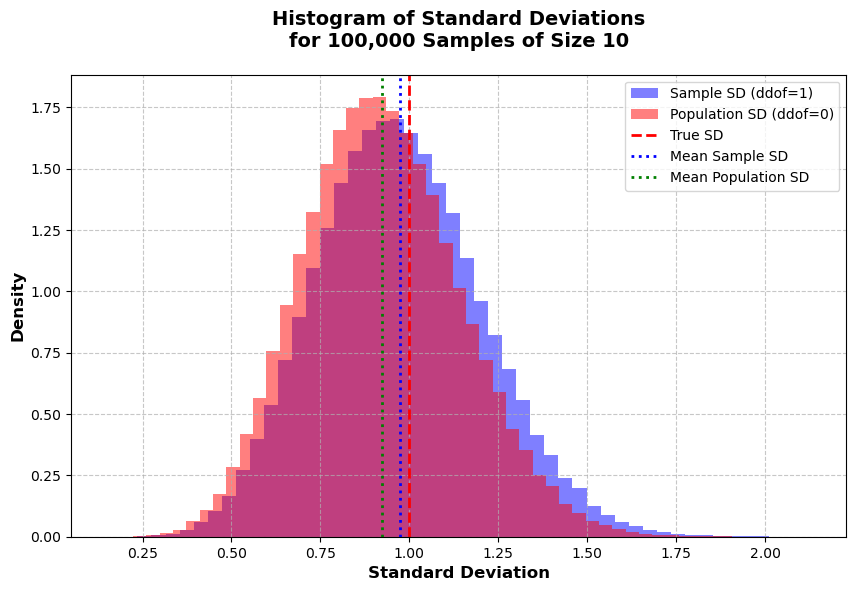

Average Sample SD (ddof=1): 0.9728728646740263
Average Population SD (ddof=0): 0.9229482378428066


In [14]:
# # Plot histograms of sample and population standard deviations
plt.figure(figsize=(10,6))

# Plot histograms with transparency and normalisation
plt.hist(sample_sd, bins=50, alpha=0.5, label='Sample SD (ddof=1)', color='blue', density=True)
plt.hist(population_sd, bins=50, alpha=0.5, label='Population SD (ddof=0)', color='red', density=True)

# Vertical lines: true SD and mean SDs
plt.axvline(1, color='red', linestyle='dashed', linewidth=2, label='True SD')
plt.axvline(mean_sample_sd, color='blue', linestyle='dotted', linewidth=2, label='Mean Sample SD')
plt.axvline(mean_population_sd, color='green', linestyle='dotted', linewidth=2, label='Mean Population SD')


# Labels and title
plt.xlabel('Standard Deviation', fontsize=12, fontweight='bold')
plt.ylabel('Density', fontsize=12, fontweight='bold')
plt.title(
    'Histogram of Standard Deviations\nfor 100,000 Samples of Size 10',
    fontsize=14,
    fontweight='bold',
    pad=20
)

# Add legend
plt.legend()

# Add a grid for better readability
plt.grid(alpha=0.7, linestyle='--')

# Display the plot
plt.show()

# Present the mean standard deviations
print("Average Sample SD (ddof=1):", mean_sample_sd)
print("Average Population SD (ddof=0):", mean_population_sd)



### Understanding Sample vs Population Standard Deviation

The following histogram displays the **standard deviations** of 100,000 samples of size 10 drawn from a standard normal distribution.

- The **blue bars** represent the **sample standard deviation**, calculated with `n−1` (Bessel’s correction), which provides an unbiased estimate when the samples are small.  
- The **red bars** display the **population standard deviation**, calculated using `n`, and this is a slight underestimate of the true standard deviation for small samples.

Both distributions are approximately bell-shaped, illustrating natural variation among samples.  
Sample standard deviation tends to be closer to the true standard deviation (1), while population standard deviation is a slight underestimate, since small samples don't capture all the variation present in the population.

The difference between the two decreases as the sample size increases, and both methods converge to the true standard deviation.


***

## Problem 3: Type II Error in Independent Samples t-Tests


***

### Objective
The goal of this simulation is to examine how the **Type II error rate (β)** changes as the difference between the two population means increases.

Based on the [Detailed Explanation of Type II Error | Sapien's AI Glossary](https://www.sapien.io/glossary/definition/type-2-error), a **Type II error** occurs when a statistical test concludes in favor of the null hypothesis even though the null hypothesis is actually false. In this case, the researcher assumes data come from **two independent normal distributions**, conducts **t-tests**, and records how often the test fails to reject the null hypothesis.

### Research and Development Context
To gain a deeper understanding of **Type II errors**, the study considers several factors that influence the **statistical 
power** of a test.

1. **Sample Size**: Increasing the sample size lowers variability, hence allowing detection of true differences by the test.
A more complete description of this relationship can be shown on the Wikipedia page for [Statistical Power](https://en.wikipedia.org/wiki/Statistical_power).

2. **Level of Significance (α):** A decrease in the level of significance α reduces the probability of Type I error but increases that of Type II. Similarly, an increased α decreases β.
For more information, see the section entitled [Significance level](https://en.wikipedia.org/wiki/Statistical_significance#Significance_level) in Wikipedia.

3. **Population Variability**: If the variability in the population is high, detecting the true differences will be difficult; this increases β. Lower variability increases the Power of detection.
The [Effect size](https://en.wikipedia.org/wiki/Effect_size) article provides further insight into how variability affects statistical Power. 

4. **Directional vs. Non-directional Tests:** Where the direction of the effect is known, a one-tailed test may reduce β; where it is not, a two-tailed test provides greater generality but at some loss of sensitivity. For more information see the [One- and two-tailed tests](https://en.wikipedia.org/wiki/One-_and_two-tailed_tests) page on Wikipedia. 

5. **Analytical Comparison:** Comparing simulation-based estimates of β with theoretical power calculations enables a more complete assessment of the simulation's validity. Analytical approaches are discussed on the [Power of a test](https://en.wikipedia.org/wiki/Power_of_a_test) page on Wikipedia. This context points out that **Type II error (β)** is influenced not only by the difference in population means but also by methodological decisions about: **sample size, significance level, population variability**, and **test direction**.

### Simulation Setup

Given this theoretical background, the subsequent simulation will be conducted to explore empirically the manner in which the **Type II error rate (β)** changes with an increased true mean difference between two populations.

For every increment of 0.1 between 0.0 and 1.0, the simulation is performed as outlined below:

---

1. **Sample Generation**  
   Two independent samples of size 100 are drawn:  
   - One from a standard normal distribution, *N*(0, 1)  
   - One from a normal distribution with mean *d* and standard deviation 1  

2. **Repetition**  
   This process is repeated 1,000 times for each value of *d*.  

3. **Hypothesis Testing**  
   - For each pair of samples, a separate independent samples *t*-test is conducted.  
   - The null hypothesis is dismissed whenever the *p*-value falls below 0.05.  

4. **Error Rate Calculation**  
   - The percentage of runs where the null hypothesis continues to hold is tracked.  
   - This represents the **Type II error rate (β)**.  

---

This allows observation of the way in which β decreases as the true difference between population means increases, hence giving empirical insight into the statistical power of the test.


#### Import Required Libraries

- **NumPy** - for efficient numerical computations and random sampling.
- **SciPy (stats)** - to perform the independent samples *t*-test.
- **Matplotlib** - for plotting the results and visualising how β changes with the mean difference.

In [ ]:
# Import necessary libraries
import numpy as np
from scipy.stats import ttest_ind
import matplotlib.pyplot as plt


#### Define Simulation Parameters

The parameters below specify the structure and precision of the simulation that estimates the **Type II error rate (β)** across varying mean differences.

- **`n`** - The sample size per group (here, 100 observations in each of two groups).  
  Larger `n` reduces sampling variability and increases the test’s statistical power.

- **`alpha`** - The significance level for the *t*-test, set at 0.05.  
  This represents a 5% risk of committing a **Type I error** (Dismissing a null hypothesis that is actually true).  
  For more details, see [Statistical significance on Wikipedia](https://en.wikipedia.org/wiki/Statistical_significance).

- **`n_sims`** — The number of independent simulation runs per condition.  
  Running many simulations (e.g., 1,000) stabilises the estimated Type II error rate.

- **`d_values`** — The true mean differences between the two populations, generated with  
  [`numpy.arange`](https://numpy.org/doc/stable/reference/generated/numpy.arange.html).  
  The range 0.0–1.0 (in steps of 0.1) allows examination of how β changes as the difference in means grows.

- **`type2_errors`** — An empty list that will store the computed Type II error rate for each mean difference value.

Together, these settings define the simulation's experimental design.

In [ ]:
# Simulation Parameters
n = 100                 # Sample size per group
alpha = 0.05            # Significance level
n_sims = 1000           # Number of simulations per condition
d_values = np.arange(0, 1.1, 0.1)  # Mean differences (0, 0.1, ..., 1.0)

# Store Type II error rates
type2_errors = []


#### Run the Vectorised Simulation

For each value of the mean difference (*d*), the simulation estimates the **Type II error rate (β)**, which reflects how often the test fails to detect a real effect.

The process for each *d* value includes the following steps:

### 1. **Data Generation**
- Two independent samples are generated using [`numpy.random.normal`](https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html).  
  - One sample is drawn from *N*(0, 1), representing the control group.  
  - The other is drawn from *N*(d, 1), representing the treatment group with a shifted mean.  
- Each sample has shape *(n_sims, n)*, allowing 1,000 experiments to be simulated at once.  
- This vectorised setup improves performance compared to running simulations one by one.

### 2. **Statistical Testing**
- The [`scipy.stats.ttest_ind`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html) function performs independent-samples *t*-tests for all simulations in a single call.  
- The argument `axis=1` ensures that each row (each experiment) is treated as a separate test.

### 3. **Type II Error Calculation**
- For each test, the *p*-value is compared to the significance level (`alpha = 0.05`).  
- If `p_value >= alpha`, the test does not reject the null hypothesis, which may indicate a Type II error.  
- The proportion of such cases is calculated using [`numpy.mean`](https://numpy.org/doc/stable/reference/generated/numpy.mean.html), resulting in the estimated β for that *d*.

### 4. **Result Storage**
- Each β value is added to the list `type2_errors` for later analysis and visualisation.

This setup shows how often a *t*-test misses a true difference as the gap between the group means increases

In [ ]:
# Run vectorised simulation for each mean difference
for d in d_values:
    # Generate samples: one with mean=0, another with mean=d
    sample1 = np.random.normal(0, 1, (n_sims, n))
    sample2 = np.random.normal(d, 1, (n_sims, n))
    
    # Conduct independent samples t-tests
    t_stats, p_values = ttest_ind(sample1, sample2, axis=1)
    
    # Calculate Type II error rate (fail to reject H₀)
    type2_rate = np.mean(p_values >= alpha)
    type2_errors.append(type2_rate)
